In [ ]:
import os 
import librosa
import math
import json
import librosa.display

path = "./breath/positive/"
sr = 22050


# Zero crossing rate
y, sr = librosa.load(path, sr = sr)
zc = librosa.feature.chroma_stft(y=y, sr=sr,n_chroma=12, n_fft=4096)

mfcc = librosa.feature.mfcc(y,
                            sr =sr,
                            n_fft = 2048,
                            n_mfcc = 13,
                            hop_length = 512
                            )
                    
chroma_cq = librosa.feature.chroma_cqt(y=y, sr=sr)

pitches, magnitudes = librosa.piptrack(y=y, sr=sr)
rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.1)

features = np.concatenate((mfcc, chroma_cq, pitches, rolloff), axis = 0)

features = features.T
# zc = librosa.feature.zero_crossing_rate(y)

# print(spectral_entropy(zc, 100, method='welch', normalize=True))

# librosa.display.waveplot(zc[0], sr)

print(mfcc.shape)
print(chroma_cq.shape)
print(pitches.shape)
print(rolloff.shape)
print(features.shape)

/home/furqan/Desktop/python_work/tensorflow_env/lib/python3.8/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


In [ ]:
# for plotting features

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
librosa.display.specshow(features, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()
plt.show()

238964


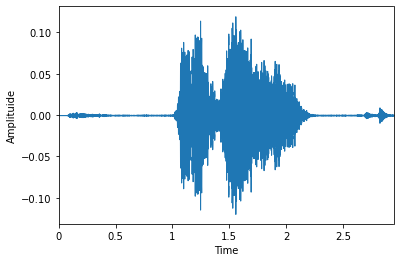

In [28]:
import os 
import librosa
import math
import matplotlib.pyplot as plt
import json
import scipy
from scipy.io import wavfile

import librosa.display

path = "./breath/positive/baaten.wav"
n_path = "./breath/baat_cleaned2.wav"
sr = 22050


# Zero crossing rate
signal, sr = librosa.load(path, sr = sr)
print(len(signal))
signal = signal[: 65000]

scipy.io.wavfile.write(n_path, 22050, signal)

librosa.display.waveplot(signal, sr = sr)
plt.xlabel("Time")
plt.ylabel("Amplituide")
plt.show()

In [30]:
import IPython.display as ipd

ipd.Audio(signal, rate=22050)

# breaking 10 sec file in 2 sec file

587060
26.624036281179137
53369
2.4203628117913834


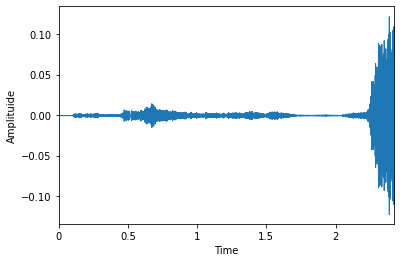

2.4203628117913834


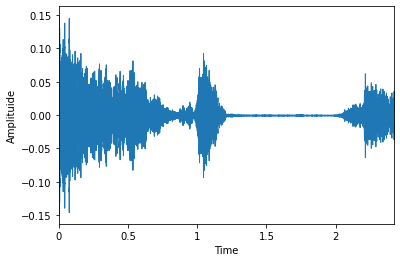

2.4203628117913834


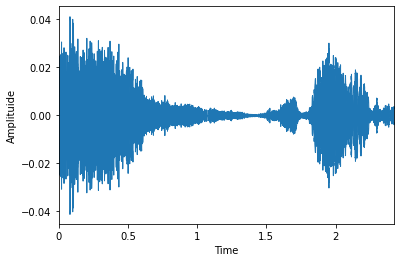

2.4203628117913834


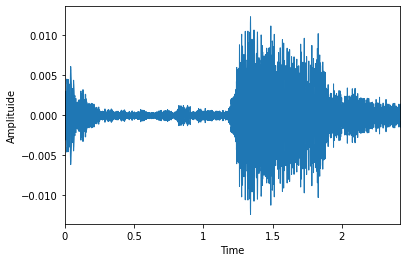

2.4203628117913834


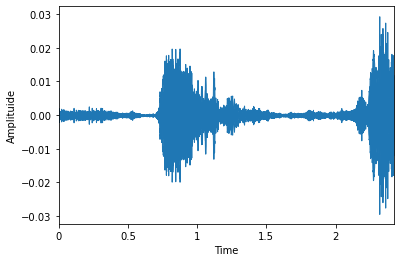

2.4203628117913834


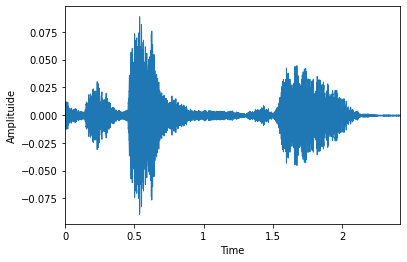

2.4203628117913834


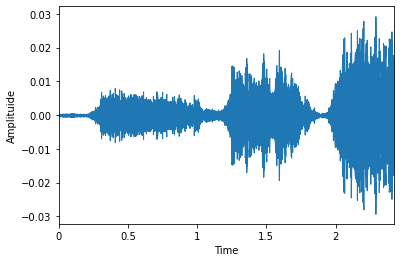

2.4203628117913834


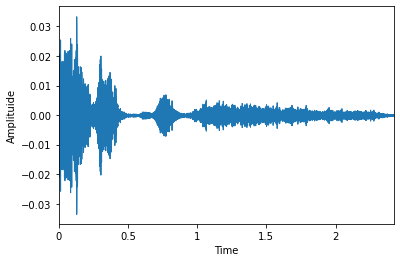

2.4203628117913834


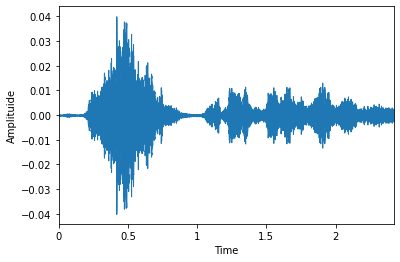

2.4203628117913834


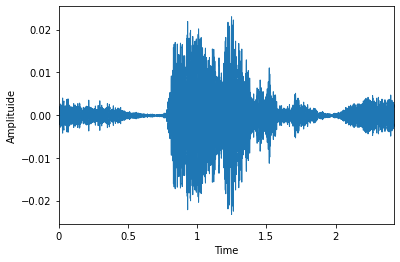

2.4203628117913834


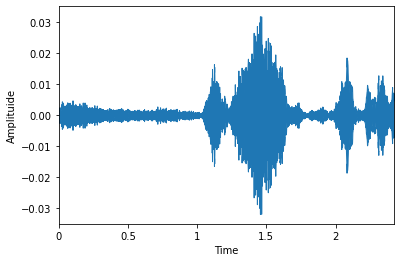

In [115]:
# For single file

import os 
import librosa
import math
import matplotlib.pyplot as plt
import json
import scipy
from scipy.io import wavfile
import glob
import librosa.display

path = "./breath/negative/neg-0421-081-breathe-f-54.wav"
n_path = "./breath/neg-0421-081-breathe-f-54"

signal, sr = librosa.load(path, sr = 22050)
print(len(signal))

duration = len(signal) / sr
print(duration)
num_segments = 11

SAMPLE_RATE = 22050
SAMPLES_PER_TRACK = SAMPLE_RATE * duration
    
num_samples_per_segment =  int(SAMPLES_PER_TRACK / num_segments)
print(num_samples_per_segment)

for s in range(num_segments):
    start_sample = num_samples_per_segment * s   
    finish_sample = start_sample + num_samples_per_segment
    
    y = signal[start_sample: finish_sample]
    dur = len(y) / sr
    print(dur)
    
    scipy.io.wavfile.write(n_path+ f'{s}' +".wav", 22050, y)
    
    librosa.display.waveplot(y, sr = SAMPLE_RATE)
    plt.xlabel("Time")
    plt.ylabel("Amplituide")
    plt.show()
    
    
    
    
# signal = signal[: 65000]

# scipy.io.wavfile.write(n_path, 22050, signal)

# librosa.display.waveplot(signal, sr = sr)
# plt.xlabel("Time")
# plt.ylabel("Amplituide")
# plt.show()

In [16]:
# For all the folder

from glob import glob
import os 
import librosa
import math
import matplotlib.pyplot as plt
import json
import scipy
from scipy.io import wavfile
import librosa.display

file = "./breath/positive/"
n_path = './breath/pos_new/'

audio_files= glob(file + '/*.wav')

for data in range(0,(len(audio_files))):
    file = audio_files[data]
    filename = os.path.basename(file)
    signal, sr = librosa.load(file, sr=22050)
    duration = len(signal) / sr
    print(duration)
    num_segments = 3

    SAMPLE_RATE = 22050
    SAMPLES_PER_TRACK = SAMPLE_RATE * duration

    num_samples_per_segment =  int(SAMPLES_PER_TRACK / num_segments)
    print(num_samples_per_segment)

    
    for s in range(num_segments):
        start_sample = num_samples_per_segment * s   
        finish_sample = start_sample + num_samples_per_segment

        y = signal[start_sample: finish_sample]
        dur = len(y) / sr
        print(dur)
        
#         scipy.io.wavfile.write(n_path+ filename + f'{s}' +".wav", 22050, y)
        scipy.io.wavfile.write(n_path+ f'{s}'+ filename, 22050, y)

    


18.346666666666668
134848
6.115555555555556
6.115555555555556
6.115555555555556
10.922675736961452
80281
3.6408616780045353
3.6408616780045353
3.6408616780045353
15.274693877551021
112269
5.09156462585034
5.09156462585034
5.09156462585034
15.189342403628117
111641
5.063083900226758
5.063083900226758
5.063083900226758
16.46934240362812
121049
5.489750566893424
5.489750566893424
5.489750566893424
20.39469387755102
149901
6.7982312925170065
6.7982312925170065
6.7982312925170065
14.59201814058957
107251
4.863990929705215
4.863990929705215
4.863990929705215
10.858684807256235
79811
3.619546485260771
3.619546485260771
3.619546485260771
26.624036281179137
195686
8.874648526077097
8.874648526077097
8.874648526077097
10.816009070294784
79497
3.6053061224489795
3.6053061224489795
3.6053061224489795
31.829342403628118
233945
10.609750566893425
10.609750566893425
10.609750566893425
16.46934240362812
121049
5.489750566893424
5.489750566893424
5.489750566893424
11.861360544217687
87181
3.95378684807

In [79]:
# For all the folder

from glob import glob
import os 
import librosa
import math
import matplotlib.pyplot as plt
import json
import scipy
import numpy as np
from scipy.io import wavfile
import librosa.display

file = "./breath/neg_new/"
new_path = './breath/neg_new/new/'

audio_files= glob(file + '/*.wav')

for data in range(0,(len(audio_files))):
    file = audio_files[data]
    filename = os.path.basename(file)
    signal, sr = librosa.load(file, sr=22050)
    
    ray = signal

    duration = len(ray) / sr
    print(duration)

    temp = np.array([])
    if duration < 5:
        while len(ray) <= 4.5*sr:
            val = 5 - duration
            duplicate = int(sr * val)
            ray = np.append(ray, ray[0:duplicate])
            duration = len(ray) / sr
#             librosa.display.waveplot(ray, sr=sr, color='green')
#             plt.xlabel("Time")
#             plt.ylabel("Amplitude")
#             plt.show()

        scipy.io.wavfile.write(new_path + filename, 22050, ray)

#     elif duration >= 5.555:
#         n = math.ceil(duration / 5)
#         start = 0
#         end = 5 * sr
#         i = 0
#         for x in filename:
#             i += 1
#             if x == '.':
#                 filename = filename[:i-1]
#         for x in range(1, n+1):
#             duration -= 5
#             if x != n:
#                 temp = ray[start:end]
#                 # librosa.display.waveplot(temp, sr=sr, color='green')
#                 # plt.xlabel("Time")
#                 # plt.ylabel("Amplitude")
#                 # plt.show()

#                 scipy.io.wavfile.write(new_path + filename + "("+ str(x) + ")" + ".wav", 22050, temp)
#                 start = end
#                 end = end + 5 * sr
#             else:
#                 end = end - 5 * sr
#                 duration = abs(duration)
#                 duplicate = int(sr * duration)
#                 while len(ray) <= 4.9 * sr:
#                     val = 5 - duration
#                     duplicate = int(sr * val)
#                     temp = np.append(ray[start:], ray[0:duplicate])
#                     duration = len(temp) / sr
#                 # librosa.display.waveplot(temp, sr=sr, color='green')
#                 # plt.xlabel("Time")
#                 # plt.ylabel("Amplitude")
#                 # plt.show()
#                 scipy.io.wavfile.write(new_path + filename + "(" + str(x) + ")" + ".wav", 22050, temp)


4.807120181405896
5.461315192743764
7.167981859410431
3.647981859410431
5.489750566893424
5.063083900226758
3.612426303854875
4.807120181405896
4.209750566893424
3.612426303854875
5.688888888888889
3.6408616780045353
8.021315192743764
5.290657596371882
4.863990929705215
4.807120181405896
6.42843537414966
5.489750566893424
5.09156462585034
3.619546485260771
5.461315192743764
3.6408616780045353
4.636417233560091
6.115555555555556
3.612426303854875
6.115555555555556
3.612426303854875
3.6053061224489795
3.612426303854875
3.612426303854875
3.647981859410431
6.826666666666667
6.200861678004535
3.612426303854875
4.863990929705215
5.063083900226758
4.351972789115647
3.612426303854875
9.130657596371883
3.612426303854875
3.9537868480725624
5.489750566893424
5.859546485260771
3.6337414965986397
5.688888888888889
3.6408616780045353
4.096009070294785
5.7457596371882085
3.6408616780045353
2.218639455782313
6.3146485260770975
3.619546485260771
3.612426303854875
7.907528344671202
3.6408616780045353
7.

# My duplication test 

159309
duration is:  7.224897959183673
6.0
Minus:  1.2248979591836735
4.775102040816327
New duration is:  2.449795918367347


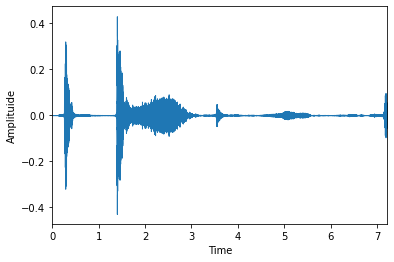

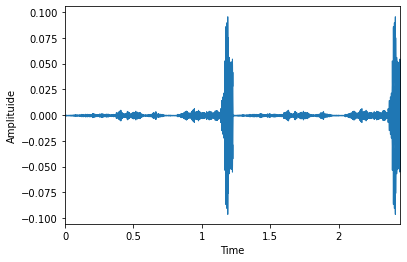

In [71]:
# import os 
# import librosa
# import math
# import matplotlib.pyplot as plt
# import json
# import scipy
# from scipy.io import wavfile

# import librosa.display

# path = "./breath/pos_new/0pos-0422-113-breathe-m-50.wav"
# n_path = "./breath/pos_new/new/0pos-0422-113-breathe-m-50.wav"
# sr = 22050

# # Zero crossing rate
# signal, sr = librosa.load(path, sr = sr)
# print(len(signal))


# # For the files bigger than 5 secs
# dur = len(signal) / sr
# print("duration is: ", dur)

# ray = signal

# val = dur - 6
# duplicate = math.ceil(sr * val)

# ray = ray[0: -duplicate]
# duration = len(ray) / sr
# print(duration)

# start = len(ray) 
# left = signal[start: ]
# duration2 = len(left) / sr
# print("Minus: ", duration2)

# val2 = 5 - duration2
# print(val2)
# ray2 = left
# # val2 = dur - 5
# duplicate2 = math.ceil(sr * val2)
# ray2 = np.append(ray2, ray2[0: duplicate2])
# duration3 = len(ray2) / sr

# print("New duration is: ", duration3)


# librosa.display.waveplot(signal, sr = sr)
# plt.xlabel("Time")
# plt.ylabel("Amplituide")
# plt.show()

# librosa.display.waveplot(ray2, sr = sr)
# plt.xlabel("Time")
# plt.ylabel("Amplituide")
# plt.show()

In [53]:
import IPython.display as ipd

ipd.Audio(ray, rate=22050)

In [81]:
from glob import glob
import os 
import librosa
import math
import matplotlib.pyplot as plt
import json
import scipy
import numpy as np
from scipy.io import wavfile
import librosa.display

file = "./breath/neg_new/"
new_path = './breath/neg_new/new2/'

audio_files= glob(file + '/*.wav')

for data in range(0,(len(audio_files))):
    file = audio_files[data]
    filename = os.path.basename(file)
    signal, sr = librosa.load(file, sr=22050)
    
    ray = signal

    dur = len(ray) / sr
#     print("duration is: ", dur)
    
    
    temp = np.array([])
    # For the files bigger than 5 secs
    
    if dur > 5.2:
        val = dur - 5
        duplicate = math.ceil(sr * val)

        ray = ray[0: -duplicate]
        duration = len(ray) / sr
        print(duration)
        
        scipy.io.wavfile.write(new_path + filename, 22050, ray)

        start = len(ray) 
        left = signal[start: ]
        duration2 = len(left) / sr
        print("bacha hua: ", duration2)

#         val2 = duration2
#         print(val2)
#         ray2 = left
#         # val2 = dur - 5
#         duplicate2 = math.ceil(sr * val2)
#         ray2 = np.append(ray2, ray2[0: duplicate2])
        
#         s = 0
#         scipy.io.wavfile.write(new_path + f'{s}' + filename , 22050, ray2)
#         s += 1
        
#         duration3 = len(ray2) / sr

#         print("New duration is: ", duration3)


5.0
bacha hua:  0.46131519274376415
5.0
bacha hua:  2.167981859410431
5.0
bacha hua:  0.48975056689342406
4.999954648526077
bacha hua:  0.6889342403628118
5.0
bacha hua:  3.021315192743764
5.0
bacha hua:  0.2906575963718821
4.999954648526077
bacha hua:  1.4284807256235827
5.0
bacha hua:  0.48975056689342406
5.0
bacha hua:  0.46131519274376415
4.999954648526077
bacha hua:  1.1156009070294786
4.999954648526077
bacha hua:  1.1156009070294786
4.999954648526077
bacha hua:  1.8267120181405896
5.0
bacha hua:  1.2008616780045351
4.999954648526077
bacha hua:  4.130702947845805
5.0
bacha hua:  0.48975056689342406
5.0
bacha hua:  0.8595464852607709
4.999954648526077
bacha hua:  0.6889342403628118
5.0
bacha hua:  0.7457596371882086
5.0
bacha hua:  1.3146485260770975
5.0
bacha hua:  2.907528344671202
5.0
bacha hua:  2.907528344671202
4.999954648526077
bacha hua:  1.8267120181405896
5.0
bacha hua:  3.078231292517007
5.0
bacha hua:  0.7173242630385488
5.0
bacha hua:  2.167981859410431
5.0
bacha hua: 